<a href="https://colab.research.google.com/github/Karan18-hub/TITANIC_SURVIVAL_PREDICTION.../blob/main/Titanic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
sns.set()

In [ ]:
titanic_data = pd.read_csv('/content/train.csv')

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.shape #to know the number of rows and columns of dataset provided to us

(891, 12)

<h1>Data Pre Processing</h1>
<p>Our data is not clean for our model to be trained on it has null values it also has certain rows and columns that might not be of use.
so we will clean data by droping columns and filling required data to get higher accuracy.

In [ ]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**we have 3 columns that have null values with us and all three columns will be handled differently**

<p>1.) Age column have a decent amount of Nan values so to resolve it we we can use .interpolate() or .mean() function to fill its value as age is an important factor in titanic survival dataset</p>

<br>
<p>2.) Cabin column has a large amount of values that were found null and to judge what cabin a person was does not hold any direct relation to its survival in a near death situation so we better discard it from train data </p>

<br>

 <p>3.) Embarked column has only 2 null values and can attain only three values C,S,Q so a mode can easily fill up the null values </P>


In [ ]:
titanic_data = titanic_data.drop(['Cabin'],axis =1,inplace = False)

In [ ]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [ ]:
titanic_data['Age'].fillna(titanic_data['Age'].interpolate(),inplace=True) #you can also use mean()

In [ ]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
titanic_data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [ ]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [ ]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**<h1>Exploratory Data Analysis</h1>**


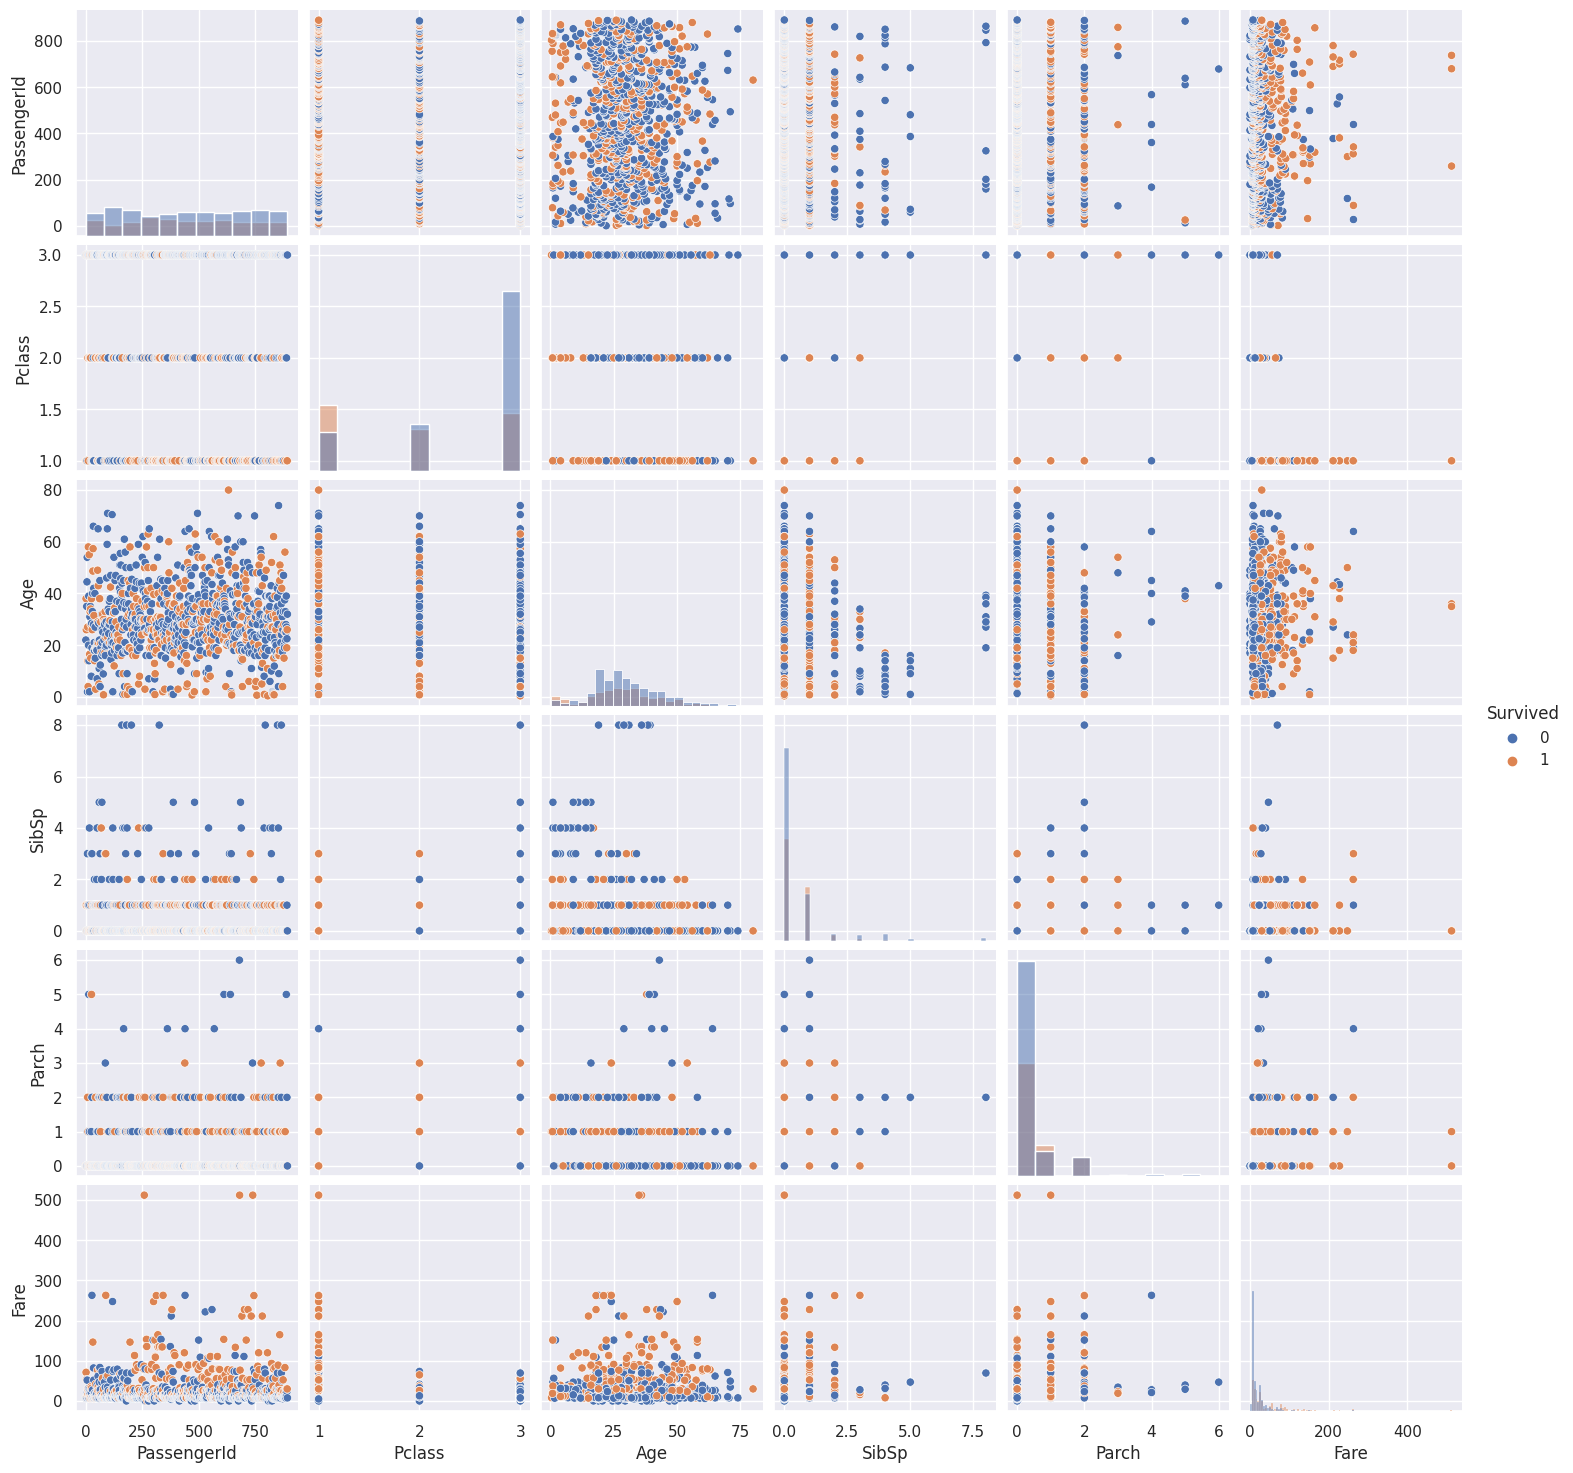

In [ ]:
sns.pairplot(data=titanic_data,diag_kind = "hist", hue ='Survived')

From pairplot the sex - survive raltion give us good distinction

In [ ]:
sns.set()

In [ ]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

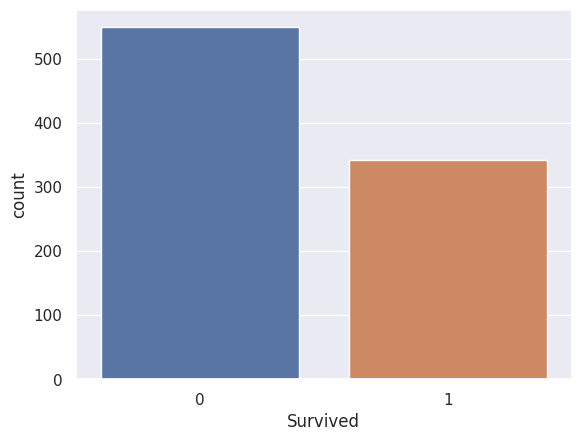

In [ ]:
sns.countplot( x=titanic_data['Survived'])

<Axes: xlabel='Sex', ylabel='count'>

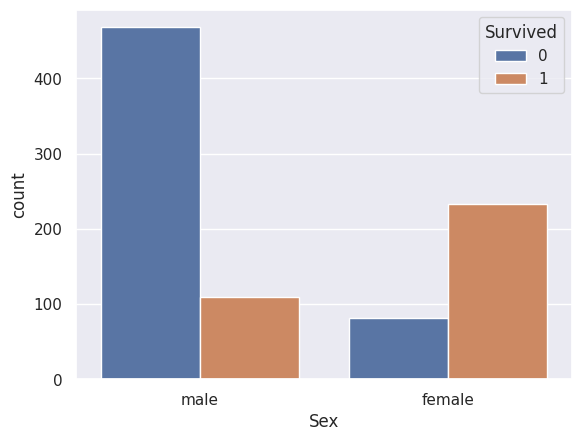

In [ ]:
sns.countplot(x=titanic_data['Sex'], hue= 'Survived', data = titanic_data)

In [ ]:
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

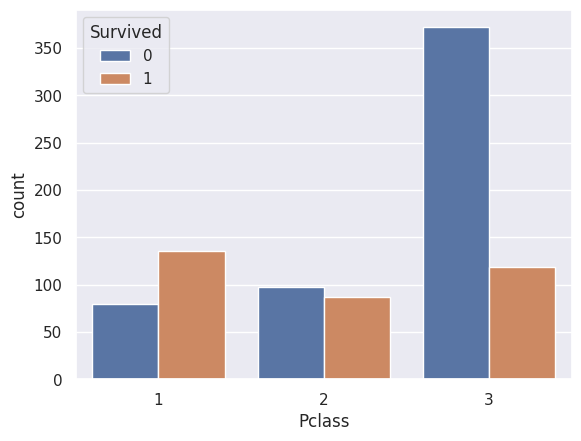

In [ ]:
sns.countplot(x=titanic_data['Pclass'], hue= 'Survived', data = titanic_data)

This trend shows that lower class on titanic people had less chances of survival

<h1><b>LABEL ENCODING</b></h1>
since sex is an important column for our modelling as seen above through data visualization for our model ease we should convert the label into numerical value of 0 and 1
male:0
female:1

and also for table Embarked
C:1
S:2
Q:3



In [ ]:
titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'C':1,"S":2,'Q':3}},inplace=True)


In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2


In [ ]:
t_train,t_test = train_test_split(titanic_data,test_size = 0.25)

In [ ]:
t_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
507,508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",0,30.5,0,0,111427,26.5500,2
431,432,1,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",1,35.0,1,0,376564,16.1000,2
181,182,0,2,"Pernot, Mr. Rene",0,18.0,0,0,SC/PARIS 2131,15.0500,1
426,427,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",1,28.0,1,0,2003,26.0000,2
705,706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",0,39.0,0,0,250655,26.0000,2
...,...,...,...,...,...,...,...,...,...,...,...
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",1,9.0,2,2,W./C. 6608,34.3750,2
233,234,1,3,"Asplund, Miss. Lillian Gertrud",1,5.0,4,2,347077,31.3875,2
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",1,16.0,1,0,17453,89.1042,1
787,788,0,3,"Rice, Master. George Hugh",0,8.0,4,1,382652,29.1250,3


In [ ]:
t_train.shape

(668, 11)

In [ ]:
t_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.00,1,0,237736,30.0708,1
497,498,0,3,"Shellard, Mr. Frederick William",0,39.50,0,0,C.A. 6212,15.1000,2
766,767,0,1,"Brewe, Dr. Arthur Jackson",0,40.75,0,0,112379,39.6000,1
94,95,0,3,"Coxon, Mr. Daniel",0,59.00,0,0,364500,7.2500,2
786,787,1,3,"Sjoblom, Miss. Anna Sofia",1,18.00,0,0,3101265,7.4958,2
...,...,...,...,...,...,...,...,...,...,...,...
492,493,0,1,"Molson, Mr. Harry Markland",0,55.00,0,0,113787,30.5000,2
226,227,1,2,"Mellors, Mr. William John",0,19.00,0,0,SW/PP 751,10.5000,2
734,735,0,2,"Troupiansky, Mr. Moses Aaron",0,23.00,0,0,233639,13.0000,2
662,663,0,1,"Colley, Mr. Edward Pomeroy",0,47.00,0,0,5727,25.5875,2


In [ ]:
x_train = t_train.drop(columns = ['Survived','Name','Ticket'],axis =0).values

In [ ]:
y_train = t_train['Survived'].values

In [ ]:
x_train

array([[508.    ,   1.    ,   0.    , ...,   0.    ,  26.55  ,   2.    ],
       [432.    ,   3.    ,   1.    , ...,   0.    ,  16.1   ,   2.    ],
       [182.    ,   2.    ,   0.    , ...,   0.    ,  15.05  ,   1.    ],
       ...,
       [850.    ,   1.    ,   1.    , ...,   0.    ,  89.1042,   1.    ],
       [788.    ,   3.    ,   0.    , ...,   1.    ,  29.125 ,   3.    ],
       [100.    ,   2.    ,   0.    , ...,   0.    ,  26.    ,   2.    ]])

In [ ]:
y_train

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,

In [ ]:
x_test = t_test.drop(columns =['Survived','Name','Ticket'],axis =0).values
y_test = t_test['Survived'].values

In [ ]:
model = LogisticRegression(max_iter = 200)

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [ ]:
model.score(x_test,y_test)

0.8071748878923767

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
np.mean(y_test == y_pred)*100

80.71748878923766

In [ ]:
test_data = pd.read_csv('/content/test.csv')

In [ ]:
test_data = test_data.drop(['Cabin'],axis = 1,inplace = False)

In [ ]:
test_data.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [ ]:
test_data['Age'].fillna(test_data['Age'].interpolate(),inplace=True)

In [ ]:
test_data['Fare'].fillna(test_data['Fare'].interpolate(),inplace=True)

In [ ]:
test_data.isnull().sum()
test_data = test_data.drop(['Name','Ticket'],axis=1)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [ ]:
test_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'C':1,"S":2,'Q':3}},inplace=True)


In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'

predictions = model.predict(test_data)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
test_data['Survived'] = predictions

In [ ]:
test_data.drop(columns = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'],axis =1,inplace = True)

In [ ]:
test_data.to_csv('Submissions.csv',header = True,index = False)